# Lab 8

K-means Clustering

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

There are plenty of RBG-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

For this assignment you are provided a file with RGB triples for a bunch of colors.

The task is to use K-means clustering to:

- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked

In [1]:
## import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

---
## Load Data

This color data was taken from a selection of digital ad images where the goal of the project was to understand if the presence of certain colors were indicative of high performing ads.

However, before making a predictive model, it was necessary to actually classify the color of RBG triples that were present in the images.

It is important to note that if the color values were uniformly distributed there would be no value in clustering.


In [2]:
url = "https://drive.google.com/file/d/1D-WVx8-CL4a1X4Gvt5MfaS7CLSHzCYa3/view?usp=sharing"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_colors = pd.read_csv(url)

---
## Examine data

If our thesis is correct, similar colors should be near each other in the 3-dimensional RBG space.

To visualize this we can plot the RBG components and verify that this is the case.

Note that in the plot below, the full RGB triple is used to tell pandas/matplotlib what color to make each dot.

In [3]:
# how many data points?
len(df_colors)

2030

In [4]:
# what is in our DataFrame?
df_colors.head()

,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


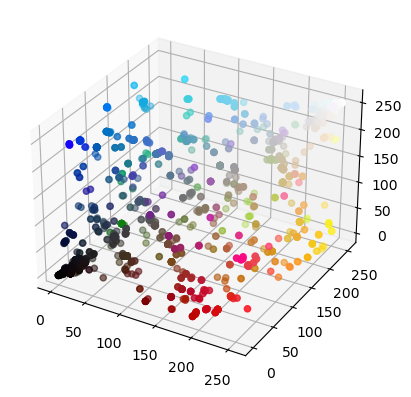

In [5]:
# make a 3d scatter plot
colors = np.array(df_colors.values)/256 # colors need to be (r,b,g) tuple in the range of 0-1

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#fig = plt.figure().gca(projection='3d')
ax.scatter(df_colors.red, df_colors.green, df_colors.blue, color=colors )

---
### Exercise 1: Construct K-means model (4 points)

Fit a KMeans model with 10 clusters.  Be sure to use a fixed `random_state` so that you get consistent results.

Use the `predict` function to get the cluster predictions for each data point and add this to the `df_colors` DataFrame 

##### Student Solution

In [6]:
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

## get np array for RBG values
X = np.array(df_colors.values)


def fit_kmeans(X, n_clusters, random_state):
    model = KMeans(n_clusters=n_clusters,
           init='random',  #or init='k-means++'
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=random_state)
    model.fit_predict(X)
    return model

model = fit_kmeans(X, n_clusters, random_state)

## get cluster prediction and add to DataFrame
df_colors['cluster'] = model.predict(X)
df_colors


,red,green,blue,cluster
0,233,197,146,0
1,183,97,58,4
2,188,84,7,4
3,247,252,254,5
4,248,253,253,5
...,...,...,...,...
2025,27,123,141,8
2026,194,193,198,0
2027,41,113,197,8
2028,35,114,197,8


## Visualize results for K-means clustering


---
### Exercise 2: Plot a histogram of the distribution of clusters (4 points)

Since there are 10 clusters, using the `pandas.DataFrame.hist()` will render the correct distribution of values across each bin since 10 is the default number of bins.

Make sure that your visual output also matches the output of `Series.value_counts()`


##### Student Solution

0    162
1    146
2    120
3    130
4    127
5    396
6     92
7    276
8    243
9    338
Name: cluster, dtype: int64

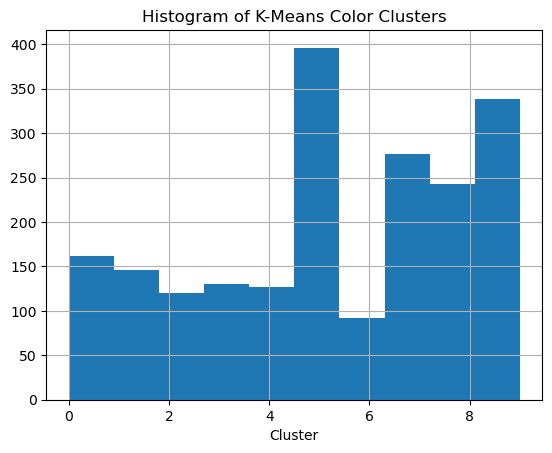

In [7]:
## plot histogram and print out number of points in each color cluster
fig = df_colors['cluster'].hist() 
fig.set_title('Histogram of K-Means Color Clusters')
fig.set_xlabel("Cluster")
## YOUR CODE HERE ##
#pandas.DataFrame.hist()
df_colors['cluster'] = df_colors['cluster'].astype(int)
df_colors['cluster'].value_counts().sort_index()


### Examine results of clustering

<AxesSubplot: xlabel='index', ylabel='cluster'>

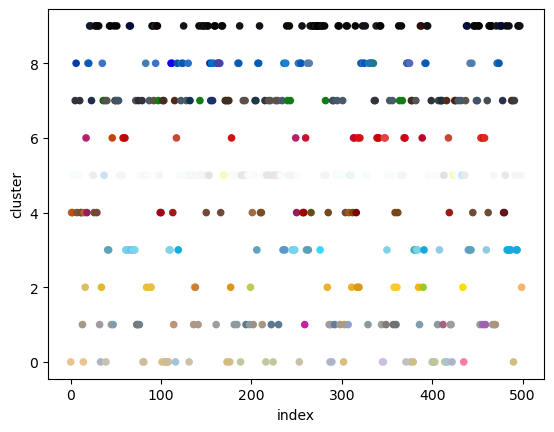

In [8]:
# take a look at distribution of colors - only the first 500 for clarity
df_colors[:500].reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors[:500])





---
### Exercise 3: Establish some human-readable names for your clusters like red, blue, yellow, etc. (4 points)

##### Student Solution

In [9]:
# name your clusters

## YOUR CODE HERE ## 

color_dict = {
    0:'tan', 
    1:'grey_blue_brown_purple', 
    2:'yellow_orange', 
    3:'light_blue', 
    4:'maroon_brown', 
    5:'pale', 
    6:'red', 
    7:'dark_blue_green', 
    8:'royal_blue', 
    9:'black'
}

color_dict

{0: 'tan',
 1: 'grey_blue_brown_purple',
 2: 'yellow_orange',
 3: 'light_blue',
 4: 'maroon_brown',
 5: 'pale',
 6: 'red',
 7: 'dark_blue_green',
 8: 'royal_blue',
 9: 'black'}

---
### Exercise 4: Determine the centroids of the clusters (4 points)


##### Student Solution

In [10]:
# get centroids
## YOUR CODE HERE ## 
centroids = model.cluster_centers_

centroids

array([[201.91975309, 192.48148148, 167.99382716],
       [143.93835616, 139.96575342, 140.95890411],
       [224.9       , 180.09166667,  41.21666667],
       [ 89.11538462, 189.97692308, 217.96923077],
       [137.27559055,  51.2992126 ,  44.79527559],
       [244.31818182, 246.98232323, 246.37121212],
       [213.32608696,  26.7826087 ,  42.92391304],
       [ 55.1557971 ,  73.49637681,  61.18478261],
       [ 32.8600823 , 102.14403292, 184.94238683],
       [ 13.74260355,  12.25739645,  16.14201183]])

---
### Exercise 5: Write a function that makes the best guess of an RGB triple based on the centroids (4 points)

The  [`KMeans.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function predicts the cluster of any test data point by returning the cluster whose center is closest to the test data point.

Without using `predict()` write a function that guesses the color of an RBG triple by finding the nearest centroid.

There are many ways to calculate distance.  For this exercise it is sufficient to use a simple Euclidean distance formula.


##### Student Solution

In [11]:
## your color guessing function
def guess_color(centroids, color_dict, test_color):
    dist_lst = [np.linalg.norm(test_color - centroid) for centroid in centroids]
    min_dist = min(dist_lst)
    print(min_dist)
    cluster_num = dist_lst.index(min_dist)
    color_name = color_dict[cluster_num]
    return color_name


color1 = [200, 5, 5]  # approximately red 
print(guess_color(centroids=centroids, color_dict=color_dict, test_color=color1))

45.71968739711572
red


---
### Exercise 6: Write a function that returns the colors name based on the `predict()` function (4 points)


In [12]:
def predict_color(model, color_dict, test_color):
    cluster_num = model.predict([test_color])[0]
    color_name = color_dict[cluster_num]
    return color_name

color1 = [200, 5, 5] # approximately red 
print(predict_color(model=model, color_dict=color_dict, test_color=color1))

red


---
### Exercise 7: Explainability - make some visual output to show that your guesses worked (4 points)

It is very important in data sceince, when possible, to have a "visual confirmation" that our code is working.  Think of this as an explainability exercise where you need to vefiry that your code it working.

Use `matplotlib` to make some visual out to verify that `color1` is indeed RED.

Here is an example, but anything that shows the color in a programmatic way is fine.

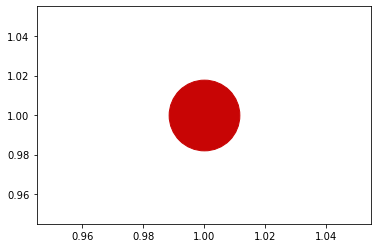




45.71968739711572


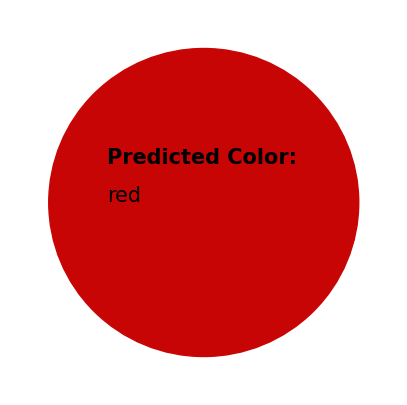

In [13]:
def show_color(test_color, color_name):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.axis('off')
    ax.add_patch(plt.Circle((0.5, 0.5), 0.4, color=[col/255 for col in test_color]))
    ax.text(0.25, 0.6, s='Predicted Color:', fontsize = 15, fontweight='bold')
    ax.text(0.25, 0.5, s=color_name, fontsize = 15)


color1 = [200, 5, 5] # approximately red 
color1_name = guess_color(centroids=centroids, color_dict=color_dict, test_color=color1)
show_color(color1, color1_name)

---
### Exercise 8: Check a range of colors (4 points)
 
Given the list of `test_colors`, predict the colors using your `guess_color` function

Comment on how good the guesses are.  Are there any unexcepted results? 


In [14]:
## generate test colors
def make_test_colors(n=3):
    test_colors = list()
    for rr in range(n+1):
        for gg in range(n+1):
            for bb in range(n+1):
                red = int(rr/n*255)
                green = int(gg/n*255)
                blue = int(bb/n*255)

            color = [red, green, blue]
            test_colors.append(color)
    test_colors = np.array(test_colors)
    
    return test_colors

128.14545498569518
79.25763077952188
98.54900862307908
116.36507284196058
134.38766179125702
88.99751707218277
42.27637302295848
74.94140906667961
182.41434418113192
129.25097632451633
91.17387965509063
75.2458056622986
211.96809291751262
148.12108420491228
78.19741242632284
15.900954709622892


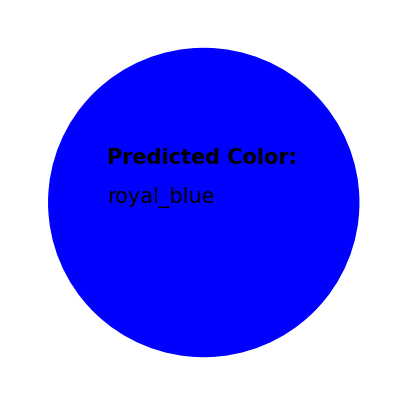

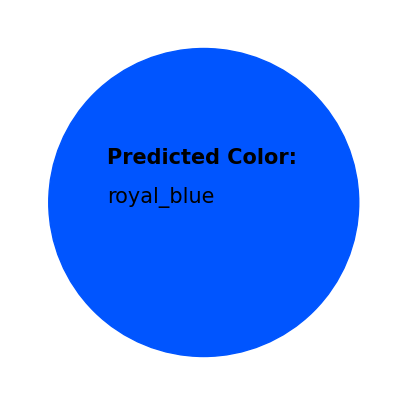

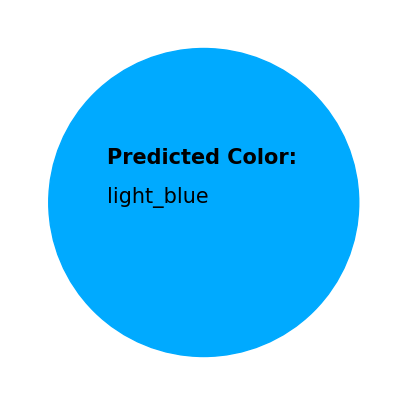

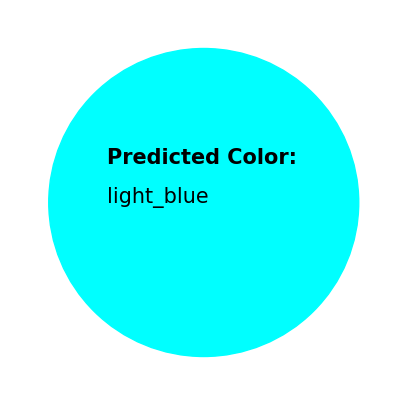

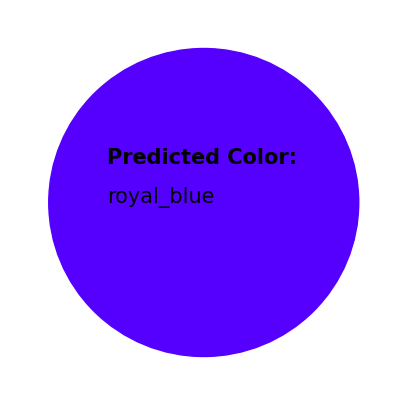

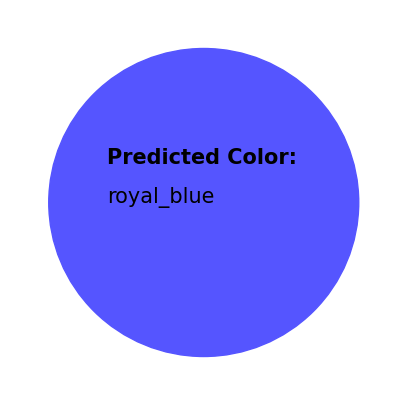

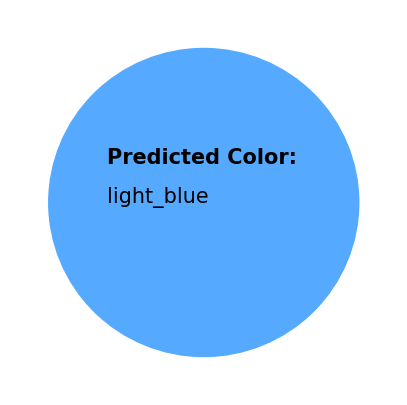

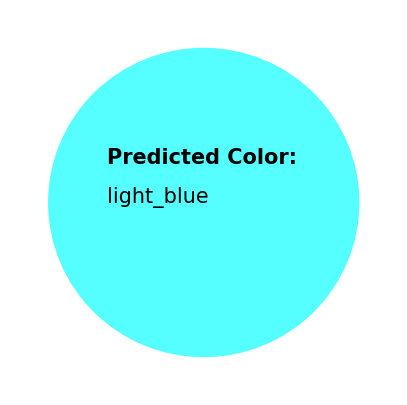

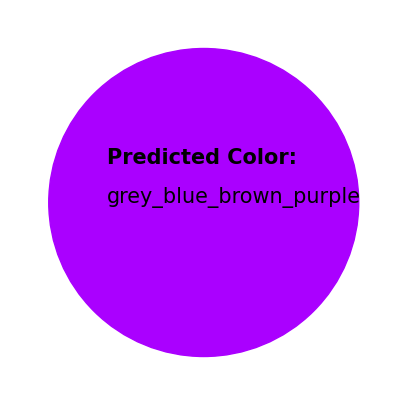

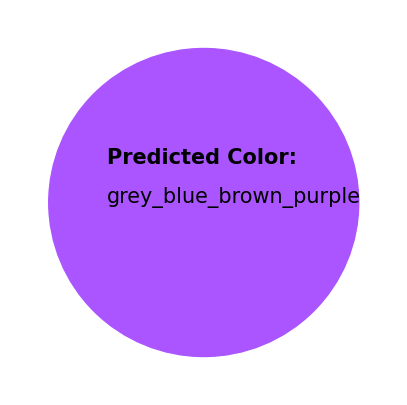

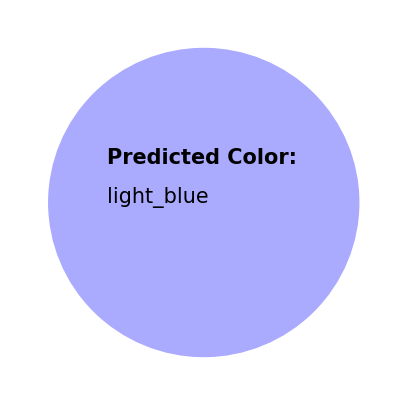

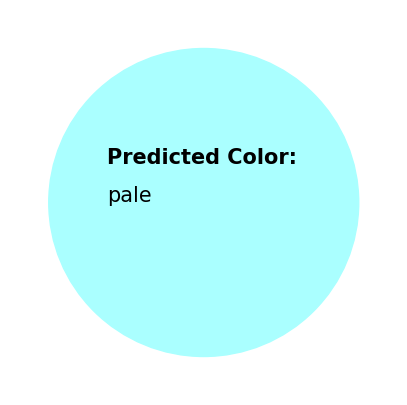

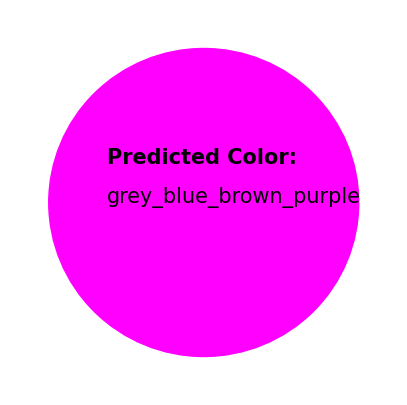

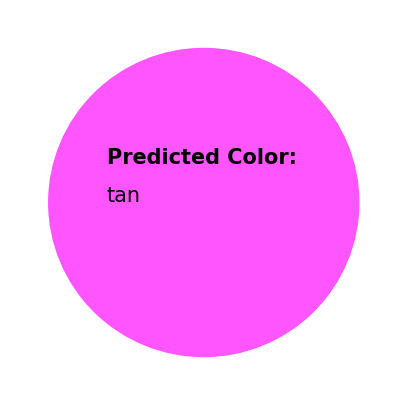

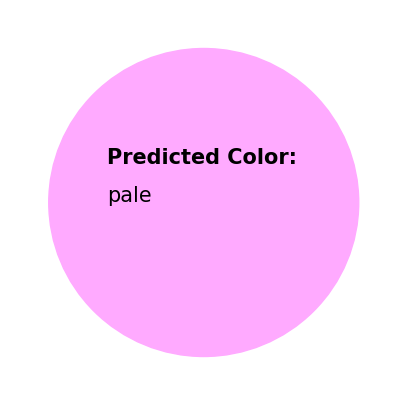

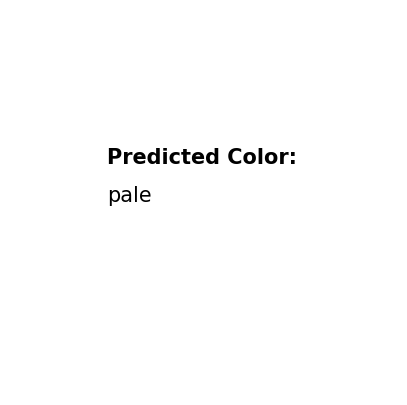

In [15]:
test_colors = make_test_colors()
test_colors
for ii,cc in enumerate(test_colors):
    test_color = cc
    color_name = guess_color(centroids=centroids, color_dict=color_dict, test_color=test_color)
    show_color(test_color, color_name)

Yes, there are unexpected results. The blues seem to be fairly consistent (minus one that looks more purple), but some of the less consistent color groupings (such as "grey_blue_brown_purple" cluster) are not as expected or have multiple different colors under the same cluster. Additionally, some of the "pale" colors are more pale than others. One of the pale colors looks like it would fit better with the light blues, another looks very pink. Overall, the clusters did not seem to work very well with the exception of a few more consistent clusters, such as the blues and red.